In [1]:
# importing relevant modules
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

## Loading Full Data set 

In [2]:
"""
Full  dataset for 2021-2023. This contains information about every ride.


ride_id: This is identity number or code of a bike              
rideable_type: This is type of bike, can be electric, classic        
started_at: The time the ride started          
ended_at    The time the ride ended        
start_station_name: The name of the station of departure   
start_station_id: The identity number or code of the station of departure     
end_station_name: The name of the station of destination   
end_station_id:  The identity number or code of the station of destination   
start_lat: The latitude of the station of departure           
start_lng :The logitude of the station of departure           
end_lat: The latitude of the station of destination              
end_lng: The longitude of the station of destination   

"""

'\nFull  dataset for 2021-2023. This contains information about every ride.\n\n\nride_id: This is identity number or code of a bike              \nrideable_type: This is type of bike, can be electric, classic        \nstarted_at: The time the ride started          \nended_at    The time the ride ended        \nstart_station_name: The name of the station of departure   \nstart_station_id: The identity number or code of the station of departure     \nend_station_name: The name of the station of destination   \nend_station_id:  The identity number or code of the station of destination   \nstart_lat: The latitude of the station of departure           \nstart_lng :The logitude of the station of departure           \nend_lat: The latitude of the station of destination              \nend_lng: The longitude of the station of destination   \n\n'

In [3]:
# loading csv file
full=pd.read_csv(r"C:\Users\godwi\OneDrive\Desktop\CBS_2021-2023_Full.csv", sep=",")

C:\Users\godwi\AppData\Local\Temp\ipykernel_28412\411486996.py:2: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  full=pd.read_csv(r"C:\Users\godwi\OneDrive\Desktop\CBS_2021-2023_Full.csv", sep=",")


In [4]:
full.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,38.894600,-77.072305,member
1,629E059504606547,electric_bike,2021-01-01 00:13:43,2021-01-01 00:29:34,10th & U St NW,31111.0,NaN,NaN,38.917193,-77.025894,38.960000,-77.020000,casual
2,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,38.920870,-77.031691,member
3,91F95E512CABC46A,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,38.879477,-77.114563,member
4,DA46A05139C0EA2F,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,38.931991,-77.032956,member


In [5]:
import pandas as pd

# Sample DataFrame
data = {'Latitude': [40.7128, 34.0522, 51.5074],
        'Longitude': [-74.0060, -118.2437, -0.1278]}
df = pd.DataFrame(data)

# Merge Latitude and Longitude into a single column
df['Lat_Long'] = df[['Latitude', 'Longitude']].apply(tuple, axis=1)

# Optionally, you can drop the original Latitude and Longitude columns
# df.drop(columns=['Latitude', 'Longitude'], inplace=True)

print(df)


   Latitude  Longitude              Lat_Long
0   40.7128   -74.0060    (40.7128, -74.006)
1   34.0522  -118.2437  (34.0522, -118.2437)
2   51.5074    -0.1278    (51.5074, -0.1278)


In [6]:
# getting summary of the Dataset
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10693997 entries, 0 to 10693996
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 1.0+ GB


In [7]:
full.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
start_lat,10693995.0,38.90,0.03,38.76,38.89,38.90,38.91,39.14
start_lng,10693995.0,-77.03,0.03,-77.40,-77.04,-77.03,-77.01,-76.82
end_lat,10677232.0,38.90,0.05,0.00,38.89,38.90,38.91,39.19
end_lng,10677232.0,-77.03,0.09,-77.56,-77.04,-77.03,-77.01,0.00


In [8]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10693997 entries, 0 to 10693996
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 1.0+ GB


Counts

In [9]:
full["rideable_type"].value_counts()

rideable_type
classic_bike     7710372
electric_bike    2444151
docked_bike       539474
Name: count, dtype: int64

In [10]:
full["member_casual"].value_counts()

member_casual
member    6492794
casual    4201203
Name: count, dtype: int64

## Data Wrangling

Checking for missing values

In [11]:
full.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    742776
start_station_id      742776
end_station_name      811282
end_station_id        811282
start_lat                  2
start_lng                  2
end_lat                16765
end_lng                16765
member_casual              0
dtype: int64

Creating of new columns

In [12]:
# Convert the 'started_at' and 'ended_at' columns to datetime format
full["started_at"] = pd.to_datetime(full['started_at'])
full["ended_at"] = pd.to_datetime(full['ended_at'])

# Extract the time component and create new columns 'start_time' and 'end_time'
#full['start_time'] = full['started_at'].dt.time
#full['end_time'] = full['ended_at'].dt.time

# Calculate the duration
full["duration"] = full["ended_at"] - full["started_at"]



In [13]:

#Start location

# Merge Latitude and Longitude into a single column
full['start_location'] = full[['start_lat', 'start_lng']].apply(tuple, axis=1)

# Optionally, you can drop the original Latitude and Longitude columns
full.drop(columns=['start_lat', 'start_lng'], inplace=True)




#End location
# Merge Latitude and Longitude into a single column
full['end_location'] = full[['end_lat', 'end_lng']].apply(tuple, axis=1)

# Optionally, you can drop the original Latitude and Longitude columns
full.drop(columns=['end_lat', 'end_lng'], inplace=True)





In [14]:
full.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,duration,start_location,end_location
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,member,0 days 00:25:20,"(38.88044, -77.025236)","(38.8946, -77.072305)"
1,629E059504606547,electric_bike,2021-01-01 00:13:43,2021-01-01 00:29:34,10th & U St NW,31111.0,NaN,NaN,casual,0 days 00:15:51,"(38.917192666666665, -77.02589416666666)","(38.96, -77.02)"
2,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,member,0 days 00:14:13,"(38.9121375, -77.03856816666666)","(38.9208705, -77.03169116666666)"
3,91F95E512CABC46A,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,member,0 days 00:05:35,"(38.87947660895433, -77.11456328630447)","(38.87947660895433, -77.11456328630447)"
4,DA46A05139C0EA2F,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,member,0 days 00:03:14,"(38.93132185874559, -77.02824711799622)","(38.931991, -77.032956)"


In [15]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10693997 entries, 0 to 10693996
Data columns (total 12 columns):
 #   Column              Dtype          
---  ------              -----          
 0   ride_id             object         
 1   rideable_type       object         
 2   started_at          datetime64[ns] 
 3   ended_at            datetime64[ns] 
 4   start_station_name  object         
 5   start_station_id    object         
 6   end_station_name    object         
 7   end_station_id      object         
 8   member_casual       object         
 9   duration            timedelta64[ns]
 10  start_location      object         
 11  end_location        object         
dtypes: datetime64[ns](2), object(9), timedelta64[ns](1)
memory usage: 979.1+ MB


In [16]:
full["duration"].value_counts()

duration
0 days 00:06:44    10382
0 days 00:06:53    10370
0 days 00:06:24    10365
0 days 00:06:09    10355
0 days 00:06:11    10350
                   ...  
1 days 04:05:44        1
0 days 22:34:30        1
0 days 22:36:34        1
0 days 23:32:34        1
0 days 15:46:15        1
Name: count, Length: 40040, dtype: int64

In [17]:
full["start_station_name"].value_counts()

start_station_name
New Hampshire Ave & T St NW        104815
Columbus Circle / Union Station    102847
15th & P St NW                      98013
Lincoln Memorial                    97827
Jefferson Dr & 14th St SW           89369
                                    ...  
MTL-ECO5-03                             2
21st NW & E St NW                       2
Kingsbridge Dr & Draper Dr              2
N Moore St & Rosslyn Metro              1
10th & Rhode Island Ave NE              1
Name: count, Length: 860, dtype: int64

Renaming of Columns

In [18]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10693997 entries, 0 to 10693996
Data columns (total 12 columns):
 #   Column              Dtype          
---  ------              -----          
 0   ride_id             object         
 1   rideable_type       object         
 2   started_at          datetime64[ns] 
 3   ended_at            datetime64[ns] 
 4   start_station_name  object         
 5   start_station_id    object         
 6   end_station_name    object         
 7   end_station_id      object         
 8   member_casual       object         
 9   duration            timedelta64[ns]
 10  start_location      object         
 11  end_location        object         
dtypes: datetime64[ns](2), object(9), timedelta64[ns](1)
memory usage: 979.1+ MB


In [19]:
full.rename(columns={'member_casual ': 'registered_casual'}, inplace=True)

In [20]:
## renaming some features
full.rename(columns={"ride_id":"Ride_ID","rideable_type":"Rideable_type","started_at":"Started_at","start_station_id":"Start_station_ID","end_station_name":"End_station_name","end_station_id":"End_station_ID","start_time":"Start_time","end_time":"End_time","duration":"Duration","start_location":"Start_location","start_station_name":"Start_station_name","ended_at":"Ended_at","end_location":"End_location","year":"Year"}, inplace=True)

In [21]:
full.rename(columns={'member_casual ': 'registered_casual'}, inplace=True)
def categorize_day(registered_casual):
    if registered_casual in ['member']:
        return 'Registered'
    else:
        return 'Casual'

# Apply the function to create a new column with categorized values
    
full['User'] = full['member_casual'].apply(categorize_day)
    


In [23]:
# dropping Start station id
full.drop(["Start_station_ID",],axis=1, inplace=True)
# dropping End station id
full.drop(["End_station_ID",],axis=1, inplace=True)
## dropping member-casual
full.drop(["member_casual",],axis=1, inplace=True)

Dataset  Spliting

In [24]:
#separate the dataset into 2021,2022 and 2023 since it is to big to process it
import pandas as pd

# Assuming you have your dataset loaded into a DataFrame called 'df'

# Convert 'started_at' column to datetime format
#full['started_at'] = pd.to_datetime(full['started_at'])

# Extract year from 'started_at' column
full['year'] = full['Started_at'].dt.year

# Create separate dataframes for each year
full_2021 = full[full['year'] == 2021]
full_2022 = full[full['year'] == 2022]
full_2023 = full[full['year'] == 2023]

# Optionally, you can drop the 'year' column if you don't need it anymore
full_2021.drop(columns=['year'], inplace=True)
full_2022.drop(columns=['year'], inplace=True)
full_2023.drop(columns=['year'], inplace=True)

# Now you have three separate dataframes for the years 2021, 2022, and 2023


C:\Users\godwi\AppData\Local\Temp\ipykernel_28412\2126850585.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_2021.drop(columns=['year'], inplace=True)
C:\Users\godwi\AppData\Local\Temp\ipykernel_28412\2126850585.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_2022.drop(columns=['year'], inplace=True)
C:\Users\godwi\AppData\Local\Temp\ipykernel_28412\2126850585.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ful

Converting to csv

In [3]:
# To export the DataFrame to a CSV file without the index
#full dataset
full.to_csv('full_complete.csv', index=False)
#2021
full_2021.to_csv('full_2021.csv', index=False)
#2022
full_2022.to_csv('full_2022.csv', index=False)
#2023
full_2023.to_csv('full_2023.csv', index=False)




NameError: name 'full' is not defined

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("full_2023.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'full_2023.csv'

## EDA

Annual Average Trips per Day per user

In [25]:
import pandas as pd


# Convert 'Started_at' and 'Ended_at' columns to datetime objects
full['Started_at'] = pd.to_datetime(full['Started_at'])
full['Ended_at'] = pd.to_datetime(full['Ended_at'])

# Calculate the duration of each trip in days
full['Trip_duration_days'] = (full['Ended_at'] - full['Started_at']).dt.days

# Group the full by user type and date, and count the number of trips
trips_per_day_by_user_type = full.groupby(['User', full['Started_at'].dt.date])['Ride_ID'].count().reset_index()

# Calculate the total number of days in the dataset
total_days = (full['Started_at'].max() - full['Started_at'].min()).days

# Calculate the annual average trips per day for each user type
annual_avg_trips_per_day = trips_per_day_by_user_type.groupby('User')['Ride_ID'].sum() / total_days

print("Annual Average Trips per Day by User Type:")
print(annual_avg_trips_per_day)


Annual Average Trips per Day by User Type:
User
Casual        3840.222121
Registered    5934.912249
Name: Ride_ID, dtype: float64


Annual Average Trips per Day per Rideable type

In [26]:
import pandas as pd

# Assuming 'full' is your DataFrame containing the dataset

# Step 1: Filter relevant columns
filtered_data = full[['Rideable_type', 'Started_at']]

# Step 2: Convert timestamps to date format
filtered_data['Started_at'] = pd.to_datetime(filtered_data['Started_at']).dt.date

# Step 3: Group by Rideable_type and date, then count trips
trips_per_day = filtered_data.groupby(['Rideable_type', 'Started_at']).size().reset_index(name='Trips')

# Step 4: Calculate total trips and total days per Rideable_type
total_trips = trips_per_day.groupby('Rideable_type')['Trips'].sum()
total_days = trips_per_day.groupby('Rideable_type')['Started_at'].nunique()

# Step 5: Calculate annual average trips per day
annual_average_trips_per_day = total_trips / total_days

print(annual_average_trips_per_day)


C:\Users\godwi\AppData\Local\Temp\ipykernel_28412\543306236.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Started_at'] = pd.to_datetime(filtered_data['Started_at']).dt.date


Rideable_type
classic_bike     7041.435616
docked_bike       547.133874
electric_bike    2232.101370
dtype: float64


In [27]:
###Annual Average Trips per Day by User Type 2021


# Convert 'Started_at' and 'Ended_at' columns to datetime objects
full_2021['Started_at'] = pd.to_datetime(full_2021['Started_at'])
full_2021['Ended_at'] = pd.to_datetime(full_2021['Ended_at'])

# Calculate the duration of each trip in days
full_2021['Trip_duration_days'] = (full_2021['Ended_at'] - full_2021['Started_at']).dt.days

# Group the full_2021 by user type and date, and count the number of trips
trips_per_day_by_user_type = full_2021.groupby(['User', full_2021['Started_at'].dt.date])['Ride_ID'].count().reset_index()

# Calculate the total number of days in the dataset
total_days = (full_2021['Started_at'].max() - full_2021['Started_at'].min()).days

# Calculate the annual average trips per day for each user type
annual_avg_trips_per_day = trips_per_day_by_user_type.groupby('User')['Ride_ID'].sum() / total_days

print("Annual Average Trips per Day by User Type 2021:")
annual_avg_trips_per_day


C:\Users\godwi\AppData\Local\Temp\ipykernel_28412\1634775357.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_2021['Started_at'] = pd.to_datetime(full_2021['Started_at'])
C:\Users\godwi\AppData\Local\Temp\ipykernel_28412\1634775357.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_2021['Ended_at'] = pd.to_datetime(full_2021['Ended_at'])
C:\Users\godwi\AppData\Local\Temp\ipykernel_28412\1634775357.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

Annual Average Trips per Day by User Type 2021:


User
Casual        3067.456044
Registered    4487.162088
Name: Ride_ID, dtype: float64

In [28]:
#Annual Average Trips per Day by User Type 2022


# Convert 'Started_at' and 'Ended_at' columns to datetime objects
full_2022['Started_at'] = pd.to_datetime(full_2022['Started_at'])
full_2022['Ended_at'] = pd.to_datetime(full_2022['Ended_at'])

# Calculate the duration of each trip in days
full_2022['Trip_duration_days'] = (full_2022['Ended_at'] - full_2022['Started_at']).dt.days

# Group the full_2022 by user type and date, and count the number of trips
trips_per_day_by_user_type = full_2022.groupby(['User', full_2022['Started_at'].dt.date])['Ride_ID'].count().reset_index()

# Calculate the total number of days in the dataset
total_days = (full_2022['Started_at'].max() - full_2022['Started_at'].min()).days

# Calculate the annual average trips per day for each user type
annual_avg_trips_per_day = trips_per_day_by_user_type.groupby('User')['Ride_ID'].sum() / total_days

print("Annual Average Trips per Day by User Type 2022:")
annual_avg_trips_per_day


C:\Users\godwi\AppData\Local\Temp\ipykernel_28412\576962746.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_2022['Started_at'] = pd.to_datetime(full_2022['Started_at'])
C:\Users\godwi\AppData\Local\Temp\ipykernel_28412\576962746.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_2022['Ended_at'] = pd.to_datetime(full_2022['Ended_at'])
C:\Users\godwi\AppData\Local\Temp\ipykernel_28412\576962746.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

Annual Average Trips per Day by User Type 2022:


User
Casual        3933.178571
Registered    5618.420330
Name: Ride_ID, dtype: float64

In [29]:
#Annual Average Trips per Day by User Type 2023


# Convert 'Started_at' and 'Ended_at' columns to datetime objects
full_2023['Started_at'] = pd.to_datetime(full_2023['Started_at'])
full_2023['Ended_at'] = pd.to_datetime(full_2023['Ended_at'])

# Calculate the duration of each trip in days
full_2023['Trip_duration_days'] = (full_2023['Ended_at'] - full_2023['Started_at']).dt.days

# Group the full_2023 by user type and date, and count the number of trips
trips_per_day_by_user_type = full_2023.groupby(['User', full_2023['Started_at'].dt.date])['Ride_ID'].count().reset_index()

# Calculate the total number of days in the dataset
total_days = (full_2023['Started_at'].max() - full_2023['Started_at'].min()).days

# Calculate the annual average trips per day for each user type
annual_avg_trips_per_day = trips_per_day_by_user_type.groupby('User')['Ride_ID'].sum() / total_days

print("Annual Average Trips per Day by User Type 2023:")
print(annual_avg_trips_per_day)


C:\Users\godwi\AppData\Local\Temp\ipykernel_28412\1960205142.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_2023['Started_at'] = pd.to_datetime(full_2023['Started_at'])
C:\Users\godwi\AppData\Local\Temp\ipykernel_28412\1960205142.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_2023['Ended_at'] = pd.to_datetime(full_2023['Ended_at'])
C:\Users\godwi\AppData\Local\Temp\ipykernel_28412\1960205142.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

Annual Average Trips per Day by User Type 2023:
User
Casual        4541.131868
Registered    7731.763736
Name: Ride_ID, dtype: float64


In [30]:
import pandas as pd

# Data for Annual Average Trips per Day by User Type for each year
data = {
    'Year': [2021, 2021, 2022, 2022, 2023, 2023],
    'User': ['Casual', 'Registered', 'Casual', 'Registered', 'Casual', 'Registered'],
    'Trips_per_Day': [3067.456044, 4487.162088, 3933.178571, 5618.420330, 4541.131868, 7731.763736]
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df


,Year,User,Trips_per_Day
0,2021,Casual,3067.456044
1,2021,Registered,4487.162088
2,2022,Casual,3933.178571
3,2022,Registered,5618.420330
4,2023,Casual,4541.131868
5,2023,Registered,7731.763736


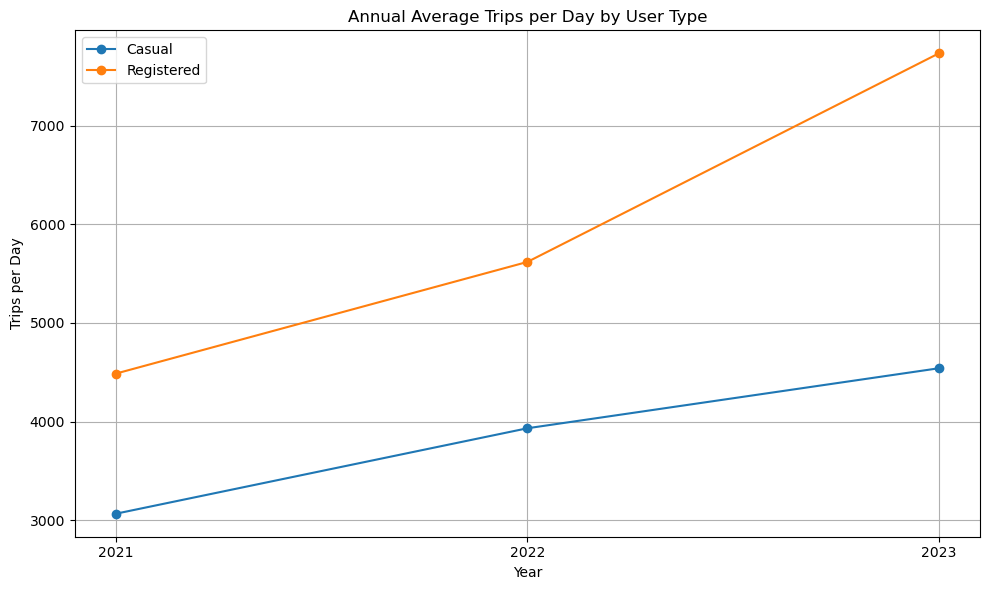

In [31]:
import matplotlib.pyplot as plt

# Data
years = [2021, 2021, 2022, 2022, 2023, 2023]
user_types = ['Casual', 'Registered', 'Casual', 'Registered', 'Casual', 'Registered']
trips_per_day = [3067.456044, 4487.162088, 3933.178571, 5618.420330, 4541.131868, 7731.763736]

# Create DataFrame
data = {'Year': years, 'User': user_types, 'Trips_per_Day': trips_per_day}
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))
for user_type in df['User'].unique():
    plt.plot(df[df['User'] == user_type]['Year'], df[df['User'] == user_type]['Trips_per_Day'], marker='o', label=user_type)

plt.title('Annual Average Trips per Day by User Type')
plt.xlabel('Year')
plt.ylabel('Trips per Day')
plt.legend()
plt.grid(True)
plt.xticks(df['Year'].unique())  # Ensure each year is labeled
plt.tight_layout()
plt.show()


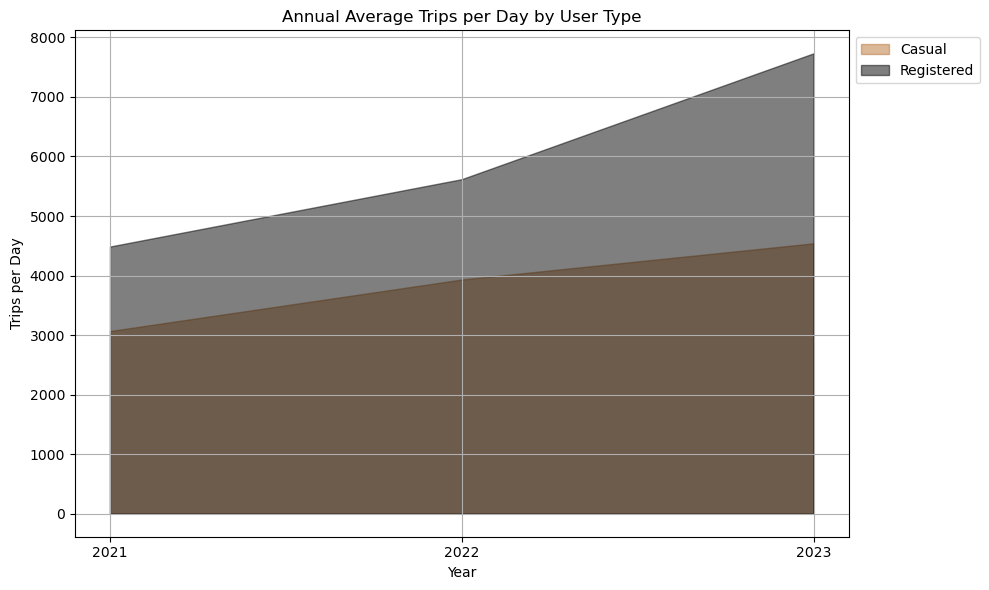

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Data
years = [2021, 2021, 2022, 2022, 2023, 2023]
user_types = ['Casual', 'Registered', 'Casual', 'Registered', 'Casual', 'Registered']
trips_per_day = [3067.456044, 4487.162088, 3933.178571, 5618.420330, 4541.131868, 7731.763736]

# Create DataFrame
data = {'Year': years, 'User': user_types, 'Trips_per_Day': trips_per_day}
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))
colors = {'Casual': '#B87333', 'Registered': 'black'}  # Light copper and black colors

for user_type in df['User'].unique():
    plt.fill_between(df[df['User'] == user_type]['Year'], 0, df[df['User'] == user_type]['Trips_per_Day'], alpha=0.5, color=colors[user_type], label=user_type)

plt.title('Annual Average Trips per Day by User Type')
plt.xlabel('Year')
plt.ylabel('Trips per Day')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)
plt.grid(True)
plt.xticks(df['Year'].unique())  # Ensure each year is labeled
plt.tight_layout()
plt.show()


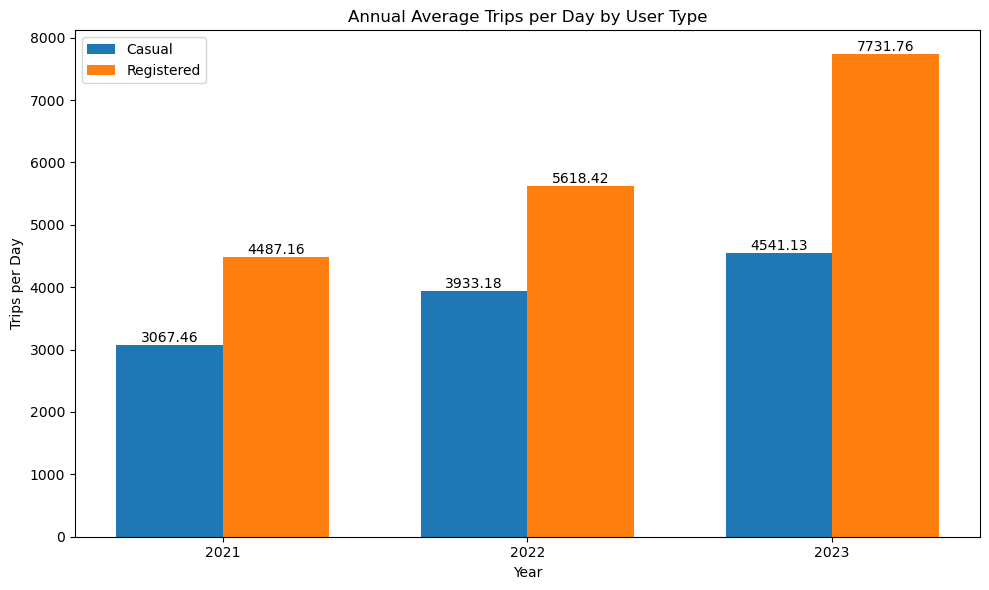

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Data
years = [2021, 2022, 2023]
user_types = ['Casual', 'Registered']
trips_per_day = [[3067.456044, 3933.178571, 4541.131868],
                 [4487.162088, 5618.420330, 7731.763736]]

# Create DataFrame
data = {'Year': years}
df = pd.DataFrame(data)

# Plotting
bar_width = 0.35
index = np.arange(len(years))

fig, ax = plt.subplots(figsize=(10, 6))

for i, user_type in enumerate(user_types):
    bars = ax.bar(index + i * bar_width, trips_per_day[i], bar_width, label=user_type)
    ax.bar_label(bars, fontsize=10)

ax.set_xlabel('Year')
ax.set_ylabel('Trips per Day')
ax.set_title('Annual Average Trips per Day by User Type')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(years)
ax.legend()
plt.tight_layout()
plt.show()


In [34]:
#Annual Average Trips per Day by Rideable Type 2021


import pandas as pd

# Assuming 'full_2021' is your DataFrame containing the dataset

# Step 1: Filter relevant columns
filtered_data = full_2021[['Rideable_type', 'Started_at']]

# Step 2: Convert timestamps to date format
filtered_data['Started_at'] = pd.to_datetime(filtered_data['Started_at']).dt.date

# Step 3: Group by Rideable_type and date, then count trips
trips_per_day = filtered_data.groupby(['Rideable_type', 'Started_at']).size().reset_index(name='Trips')

# Step 4: Calculate total trips and total days per Rideable_type
total_trips = trips_per_day.groupby('Rideable_type')['Trips'].sum()
total_days = trips_per_day.groupby('Rideable_type')['Started_at'].nunique()

# Step 5: Calculate annual average trips per day
annual_average_trips_per_day = total_trips / total_days

print("Annual Average Trips per Day by Rideable Type 2021:")
print(annual_average_trips_per_day)


C:\Users\godwi\AppData\Local\Temp\ipykernel_28412\1013998456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Started_at'] = pd.to_datetime(filtered_data['Started_at']).dt.date


Annual Average Trips per Day by Rideable Type 2021:
Rideable_type
classic_bike     5550.265753
docked_bike       551.298630
electric_bike    1432.356164
dtype: float64


In [35]:
#Annual Average Trips per Day by Rideable Type 2022
import pandas as pd

# Assuming 'full 2022' is your DataFrame containing the dataset

# Step 1: Filter relevant columns
filtered_data = full_2022[['Rideable_type', 'Started_at']]

# Step 2: Convert timestamps to date format
filtered_data['Started_at'] = pd.to_datetime(filtered_data['Started_at']).dt.date

# Step 3: Group by Rideable_type and date, then count trips
trips_per_day = filtered_data.groupby(['Rideable_type', 'Started_at']).size().reset_index(name='Trips')

# Step 4: Calculate total trips and total days per Rideable_type
total_trips = trips_per_day.groupby('Rideable_type')['Trips'].sum()
total_days = trips_per_day.groupby('Rideable_type')['Started_at'].nunique()

# Step 5: Calculate annual average trips per day
annual_average_trips_per_day = total_trips / total_days

print("Annual Average Trips per Day by Rideable Type 2022:")
print(annual_average_trips_per_day)


C:\Users\godwi\AppData\Local\Temp\ipykernel_28412\3876546332.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Started_at'] = pd.to_datetime(filtered_data['Started_at']).dt.date


Annual Average Trips per Day by Rideable Type 2022:
Rideable_type
classic_bike     7482.246575
docked_bike       615.882192
electric_bike    1427.301370
dtype: float64


In [36]:
#Annual Average Trips per Day by Rideable Type 2023

import pandas as pd

# Assuming 'full' is your DataFrame containing the dataset

# Step 1: Filter relevant columns
filtered_data = full_2023[['Rideable_type', 'Started_at']]

# Step 2: Convert timestamps to date format
filtered_data['Started_at'] = pd.to_datetime(filtered_data['Started_at']).dt.date

# Step 3: Group by Rideable_type and date, then count trips
trips_per_day = filtered_data.groupby(['Rideable_type', 'Started_at']).size().reset_index(name='Trips')

# Step 4: Calculate total trips and total days per Rideable_type
total_trips = trips_per_day.groupby('Rideable_type')['Trips'].sum()
total_days = trips_per_day.groupby('Rideable_type')['Started_at'].nunique()

# Step 5: Calculate annual average trips per day
annual_average_trips_per_day = total_trips / total_days

print("Annual Average Trips per Day by Rideable Type 2023:")
print(annual_average_trips_per_day)


C:\Users\godwi\AppData\Local\Temp\ipykernel_28412\3538467987.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Started_at'] = pd.to_datetime(filtered_data['Started_at']).dt.date


Annual Average Trips per Day by Rideable Type 2023:
Rideable_type
classic_bike     8091.794521
docked_bike       443.175781
electric_bike    3836.646575
dtype: float64


In [37]:
import pandas as pd

# Data for Annual Average Trips per Day by Rideable Type for each year
data = {
    'Year': [2021, 2021, 2021, 2022, 2022, 2022, 2023, 2023, 2023],
    'Rideable_type': ['classic_bike', 'docked_bike', 'electric_bike',
                      'classic_bike', 'docked_bike', 'electric_bike',
                      'classic_bike', 'docked_bike', 'electric_bike'],
    'Trips_per_Day': [5550.265753, 551.298630, 1432.356164,
                      7482.246575, 615.882192, 1427.301370,
                      8091.794521, 443.175781, 3836.646575]
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df


,Year,Rideable_type,Trips_per_Day
0,2021,classic_bike,5550.265753
1,2021,docked_bike,551.298630
2,2021,electric_bike,1432.356164
3,2022,classic_bike,7482.246575
4,2022,docked_bike,615.882192
5,2022,electric_bike,1427.301370
6,2023,classic_bike,8091.794521
7,2023,docked_bike,443.175781
8,2023,electric_bike,3836.646575


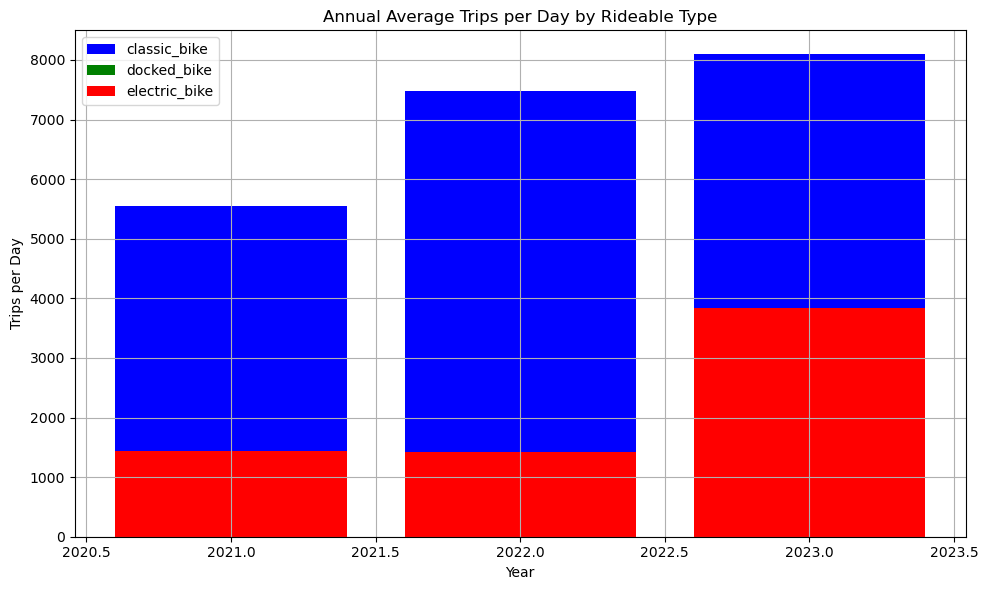

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
data = {
    'Year': [2021, 2021, 2021, 2022, 2022, 2022, 2023, 2023, 2023],
    'Rideable_type': ['classic_bike', 'docked_bike', 'electric_bike'] * 3,
    'Trips_per_Day': [5550.265753, 551.298630, 1432.356164,
                      7482.246575, 615.882192, 1427.301370,
                      8091.794521, 443.175781, 3836.646575]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))
colors = {'classic_bike': 'b', 'docked_bike': 'g', 'electric_bike': 'r'}

for rideable_type in df['Rideable_type'].unique():
    subset = df[df['Rideable_type'] == rideable_type]
    plt.bar(subset['Year'], subset['Trips_per_Day'], color=colors.get(rideable_type, 'k'), label=rideable_type)

plt.xlabel('Year')
plt.ylabel('Trips per Day')
plt.title('Annual Average Trips per Day by Rideable Type')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


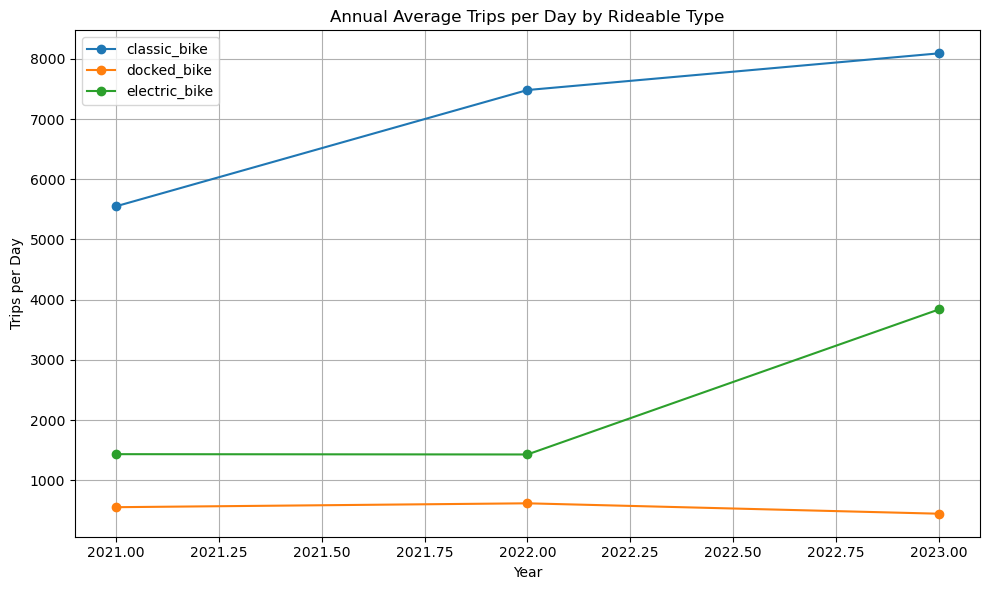

In [39]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
data = {
    'Year': [2021, 2021, 2021, 2022, 2022, 2022, 2023, 2023, 2023],
    'Rideable_type': ['classic_bike', 'docked_bike', 'electric_bike'] * 3,
    'Trips_per_Day': [5550.265753, 551.298630, 1432.356164,
                      7482.246575, 615.882192, 1427.301370,
                      8091.794521, 443.175781, 3836.646575]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))

for rideable_type in df['Rideable_type'].unique():
    subset = df[df['Rideable_type'] == rideable_type]
    plt.plot(subset['Year'], subset['Trips_per_Day'], marker='o', label=rideable_type)

plt.xlabel('Year')
plt.ylabel('Trips per Day')
plt.title('Annual Average Trips per Day by Rideable Type')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


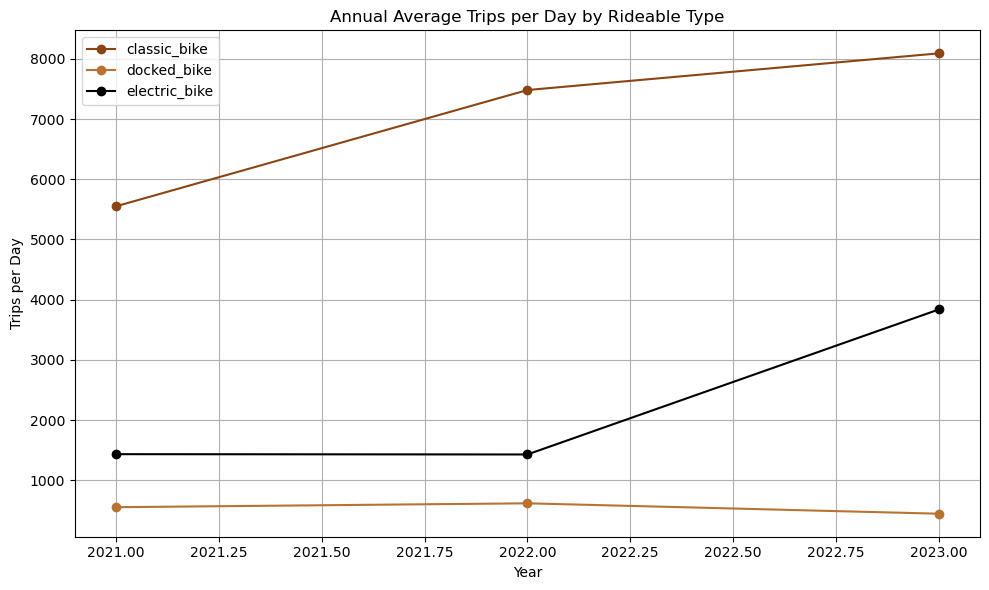

In [40]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
data = {
    'Year': [2021, 2021, 2021, 2022, 2022, 2022, 2023, 2023, 2023],
    'Rideable_type': ['classic_bike', 'docked_bike', 'electric_bike'] * 3,
    'Trips_per_Day': [5550.265753, 551.298630, 1432.356164,
                      7482.246575, 615.882192, 1427.301370,
                      8091.794521, 443.175781, 3836.646575]
}

# Create DataFrame
df = pd.DataFrame(data)

# Define custom color palette with dark brown, copper, and grey colors
custom_palette = ['#8B4513', '#B87333', 'black']

# Plotting
plt.figure(figsize=(10, 6))

for i, rideable_type in enumerate(df['Rideable_type'].unique()):
    subset = df[df['Rideable_type'] == rideable_type]
    plt.plot(subset['Year'], subset['Trips_per_Day'], marker='o', color=custom_palette[i], label=rideable_type)

plt.xlabel('Year')
plt.ylabel('Trips per Day')
plt.title('Annual Average Trips per Day by Rideable Type')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [41]:
import pandas as pd

# Concatenate start and end station names
stations = pd.concat([full['Start_station_name'], full['End_station_name']]).reset_index(drop=True)

# Count occurrences of each station
top_stations = stations.value_counts().head(10)

print("Top ten stations frequently used as start and end stations:")
top_stations


Top ten stations frequently used as start and end stations:


New Hampshire Ave & T St NW                              208036
Columbus Circle / Union Station                          207436
15th & P St NW                                           196868
Lincoln Memorial                                         193859
Jefferson Dr & 14th St SW                                181527
1st & M St NE                                            178725
4th St & Madison Dr NW                                   168583
5th & K St NW                                            158221
Smithsonian-National Mall / Jefferson Dr & 12th St SW    157063
Eastern Market Metro / Pennsylvania Ave & 8th St SE      155810
Name: count, dtype: int64

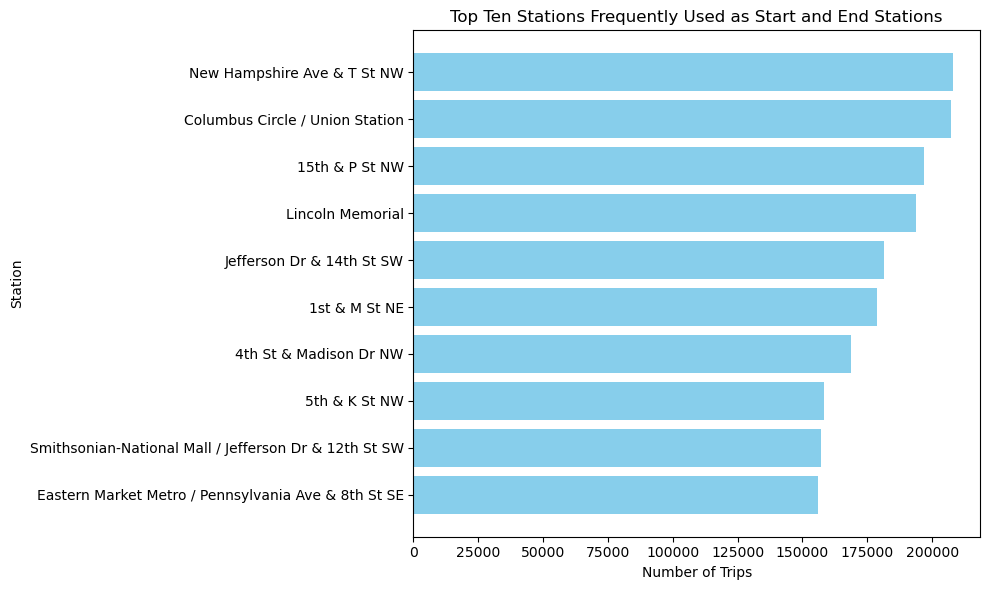

In [42]:
import matplotlib.pyplot as plt

# Data
stations_data = {
    'Station': [
        'New Hampshire Ave & T St NW',
        'Columbus Circle / Union Station',
        '15th & P St NW',
        'Lincoln Memorial',
        'Jefferson Dr & 14th St SW',
        '1st & M St NE',
        '4th St & Madison Dr NW',
        '5th & K St NW',
        'Smithsonian-National Mall / Jefferson Dr & 12th St SW',
        'Eastern Market Metro / Pennsylvania Ave & 8th St SE'
    ],
    'Trips': [
        208036,
        207436,
        196868,
        193859,
        181527,
        178725,
        168583,
        158221,
        157063,
        155810
    ]
}

# Create DataFrame
df = pd.DataFrame(stations_data)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(df['Station'], df['Trips'], color='skyblue')
plt.xlabel('Number of Trips')
plt.ylabel('Station')
plt.title('Top Ten Stations Frequently Used as Start and End Stations')
plt.gca().invert_yaxis()  # Invert y-axis to display the station with the highest trips at the top
plt.tight_layout()
plt.show()


In [43]:
full.head(2)

,Ride_ID,Rideable_type,Started_at,Ended_at,Start_station_name,End_station_name,Duration,Start_location,End_location,User,year,Trip_duration_days
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,0 days 00:25:20,"(38.88044, -77.025236)","(38.8946, -77.072305)",Registered,2021,0
1,629E059504606547,electric_bike,2021-01-01 00:13:43,2021-01-01 00:29:34,10th & U St NW,NaN,0 days 00:15:51,"(38.917192666666665, -77.02589416666666)","(38.96, -77.02)",Casual,2021,0


In [44]:
# Convert 'Started_at' to datetime
full['Started_at'] = pd.to_datetime(full['Started_at'])

# Extract hour
full['Hour'] = full['Started_at'].dt.hour

# Filter trips between 10 and 15 hours
filtered_df = full[(full['Hour'] >= 10) & (full['Hour'] <= 15)]

# Count trips by user type
user_trips = filtered_df['User'].value_counts()

# Create DataFrame of user types based on number of trips between 10 and 15 hours
user_trips_df = pd.DataFrame(user_trips)
user_trips_df.columns = ['No_of_trips']

print("Data frame of user types based on number of trips between the hours of 10 and 15:")
user_trips_df

Data frame of user types based on number of trips between the hours of 10 and 15:


,No_of_trips
User,
Registered,2097479
Casual,1682491


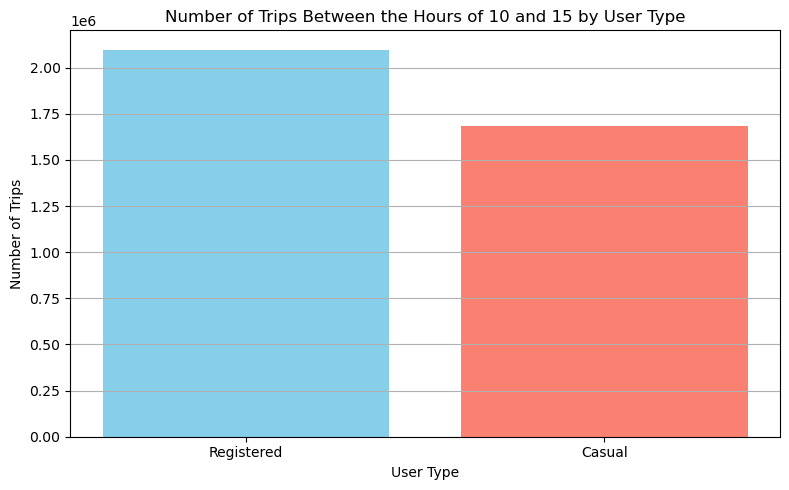

In [45]:
import matplotlib.pyplot as plt

# Data
user_trips_data = {
    'User': ['Registered', 'Casual'],
    'No_of_trips': [2097479, 1682491]
}

# Create DataFrame
user_trips_df = pd.DataFrame(user_trips_data)

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(user_trips_df['User'], user_trips_df['No_of_trips'], color=['skyblue', 'salmon'])
plt.xlabel('User Type')
plt.ylabel('Number of Trips')
plt.title('Number of Trips Between the Hours of 10 and 15 by User Type')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [46]:
print("2021")
print(full_2021["Rideable_type"].value_counts())
print("2022")
print(full_2022["Rideable_type"].value_counts())
print("2023")
print(full_2023["Rideable_type"].value_counts())

2021
Rideable_type
classic_bike     2025847
electric_bike     522810
docked_bike       201224
Name: count, dtype: int64
2022
Rideable_type
classic_bike     2731020
electric_bike     520965
docked_bike       224797
Name: count, dtype: int64
2023
Rideable_type
classic_bike     2953505
electric_bike    1400376
docked_bike       113453
Name: count, dtype: int64


Top ten stations at weekend rush hour

In [47]:
## Getting top ten stations at weekend rush hour


# Example station_data DataFrame:
station_data = pd.DataFrame({'Station': full['Start_station_name'],
                             'Timestamp': full['Started_at']})

# Convert 'Timestamp' column to datetime format
station_data['Timestamp'] = pd.to_datetime(station_data['Timestamp'])

# Extract hour from Timestamp
station_data['Hour'] = station_data['Timestamp'].dt.hour

# Define weekend rush hour range 
weekend_rush_hour = range(9, 16)

# Filter data for weekend rush hour entries
weekend_rush_hour_data = station_data[station_data['Hour'].isin(weekend_rush_hour)]

# Count entries for each station during weekend rush hour
station_counts =weekend_rush_hour_data['Station'].value_counts()

# Get top 5 stations
top_10_stations_weekend = station_counts.head(10)

# Create DataFrame from top 5 stations
top_10_stations_weekend_df = pd.DataFrame({'Station': top_10_stations_weekend.index, 'Frequency': top_10_stations_weekend.values})

top_10_stations_weekend_df


,Station,Frequency
0,Lincoln Memorial,50837
1,Jefferson Dr & 14th St SW,47795
2,4th St & Madison Dr NW,47588
3,Smithsonian-National Mall / Jefferson Dr & 12t...,40621
4,Henry Bacon Dr & Lincoln Memorial Circle NW,38743
5,1st & M St NE,36369
6,New Hampshire Ave & T St NW,35166
7,15th & P St NW,35131
8,Eastern Market Metro / Pennsylvania Ave & 8th ...,33616
9,Columbus Circle / Union Station,33189


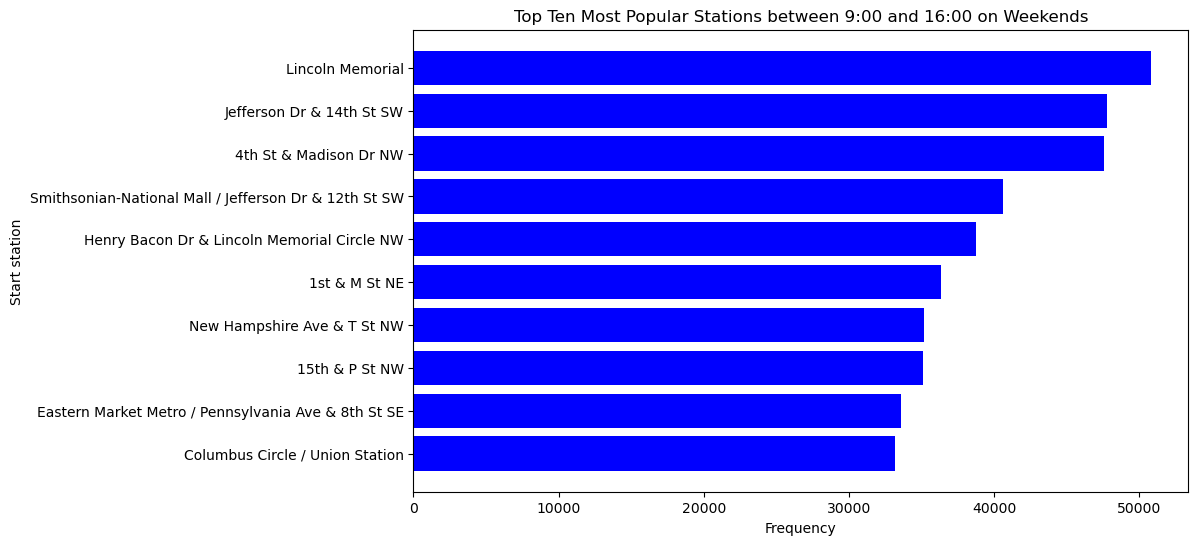

In [48]:
# Plotting for Top ten stations at weekend rush hour
plt.figure(figsize=(10, 6))
plt.barh(top_10_stations_weekend_df['Station'], top_10_stations_weekend_df['Frequency'], color='blue')
plt.xlabel('Frequency')
plt.ylabel('Start station')
plt.title('Top Ten Most Popular Stations between 9:00 and 16:00 on Weekends')
plt.gca().invert_yaxis()  # Invert y-axis to display the most frequent value at the top
plt.show()

Top ten stations at working day morning rush hour

In [49]:
## Getting top ten stations at working day morning rush hour

# Example station_data DataFrame:
station_data = pd.DataFrame({'Station': full['Start_station_name'],
                             'Timestamp': full['Started_at']})

# Convert 'Timestamp' column to datetime format
station_data['Timestamp'] = pd.to_datetime(station_data['Timestamp'])

# Extract hour from Timestamp
station_data['Hour'] = station_data['Timestamp'].dt.hour

# Define morning working_day rush hour range (e.g., 6 AM to 10 AM)
morning_working_day_rush_hour = range(5, 9)

# Filter data for weekend rush hour entries
morning_working_day_rush_hour_data = station_data[station_data['Hour'].isin(morning_working_day_rush_hour)]

# Count entries for each station during weekend rush hour
station_counts =morning_working_day_rush_hour_data['Station'].value_counts()

# Get top 10 stations
top_10_stations_morning= station_counts.head(10)

# Create DataFrame from top 10 stations
top_10_stations_morning_df = pd.DataFrame({'Station': top_10_stations_morning.index, 'Frequency': top_10_stations_morning.values})

top_10_stations_morning_df


,Station,Frequency
0,New Hampshire Ave & T St NW,19817
1,Columbus Circle / Union Station,18180
2,15th & W St NW,13274
3,15th & P St NW,12936
4,5th & K St NW,12630
5,11th & M St NW,12170
6,14th & V St NW,12142
7,Thomas Circle,10712
8,17th & Corcoran St NW,10120
9,8th & O St NW,9756


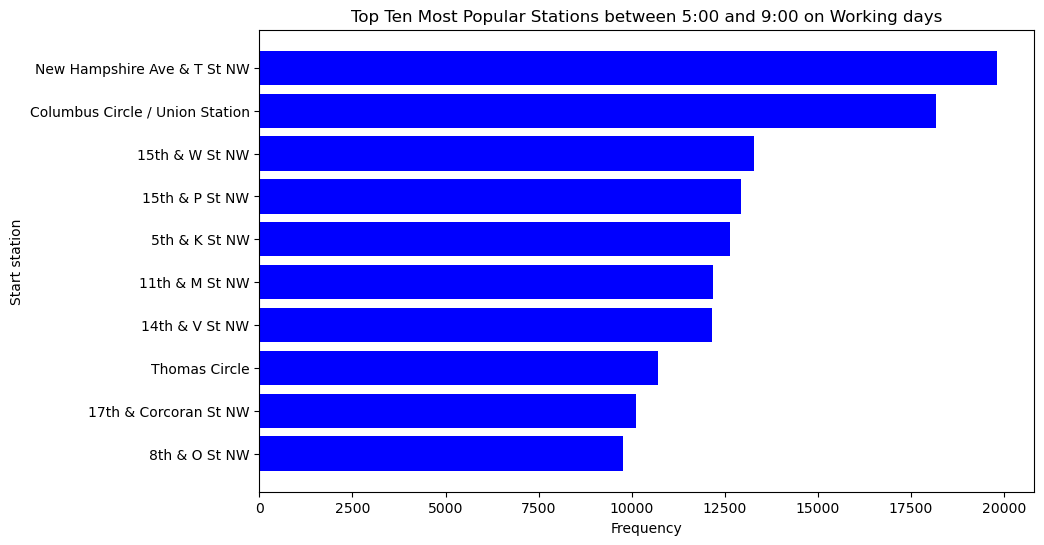

In [50]:
# Plotting for Top ten stations at working day morning rush hour
plt.figure(figsize=(10, 6))
plt.barh(top_10_stations_morning_df['Station'], top_10_stations_morning_df['Frequency'], color='blue')
plt.xlabel('Frequency')
plt.ylabel('Start station')
plt.title('Top Ten Most Popular Stations between 5:00 and 9:00 on Working days')
plt.gca().invert_yaxis()  # Invert y-axis to display the most frequent value at the top
plt.show()

Top ten start stations at working day evening rush hour

In [51]:
## Getting top ten start stations at working day evening rush hour

# Example station_data DataFrame:
station_data = pd.DataFrame({'Station': full['Start_station_name'],## START STATION 
                             'Timestamp': full['Started_at']})

# Convert 'Timestamp' column to datetime format
station_data['Timestamp'] = pd.to_datetime(station_data['Timestamp'])

# Extract hour from Timestamp
station_data['Hour'] = station_data['Timestamp'].dt.hour

# Define morning working_day rush hour range 
evening_working_day_rush_hour = range(16, 22)

# Filter data for weekend rush hour entries
evening_working_day_rush_hour_data = station_data[station_data['Hour'].isin(evening_working_day_rush_hour)]

# Count entries for each station during weekend rush hour
station_counts =evening_working_day_rush_hour_data['Station'].value_counts()

# Get top 10 stations
top_10_stations_evening= station_counts.head(10)

# Create DataFrame from top 10 stations
top_10_stations_evening_df = pd.DataFrame({'Station': top_10_stations_evening.index, 'Frequency': top_10_stations_evening.values})

top_10_stations_evening_df

,Station,Frequency
0,Columbus Circle / Union Station,45176
1,New Hampshire Ave & T St NW,42154
2,15th & P St NW,41586
3,Lincoln Memorial,38815
4,1st & M St NE,38336
5,Jefferson Dr & 14th St SW,35522
6,Eastern Market Metro / Pennsylvania Ave & 8th ...,34186
7,4th St & Madison Dr NW,33790
8,Smithsonian-National Mall / Jefferson Dr & 12t...,33357
9,5th & K St NW,32718


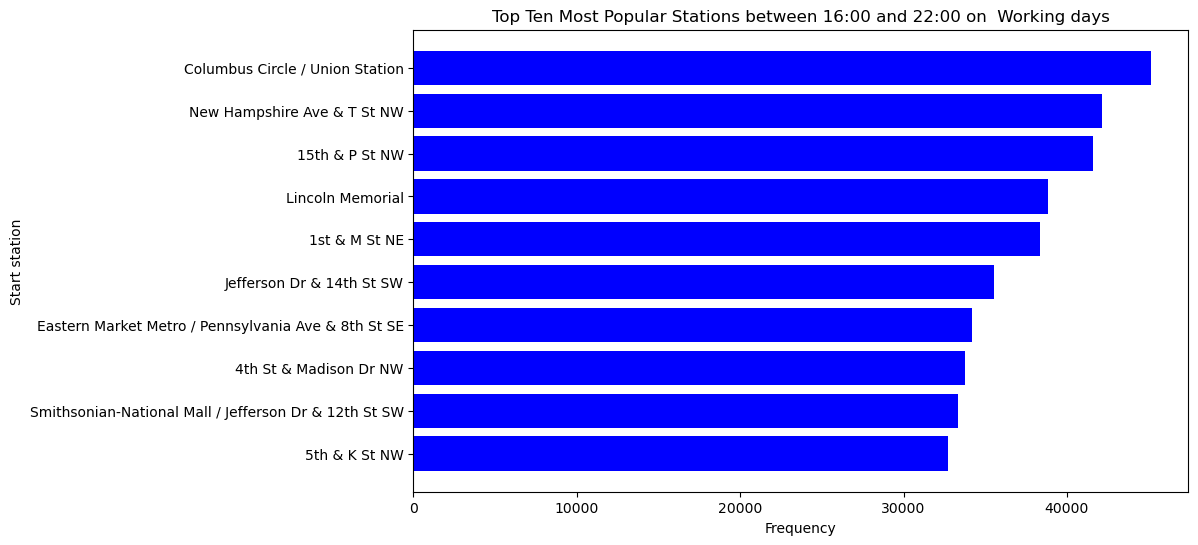

In [52]:
# Plotting for Top ten stations at working day evening rush hour
plt.figure(figsize=(10, 6))
plt.barh(top_10_stations_evening_df['Station'], top_10_stations_evening_df['Frequency'], color='blue')
plt.xlabel('Frequency')
plt.ylabel('Start station')
plt.title('Top Ten Most Popular Stations between 16:00 and 22:00 on  Working days')
plt.gca().invert_yaxis()  # Invert y-axis to display the most frequent value at the top
plt.show()

In [53]:

# Group by rideable_type and user, then count the occurrences
user_ride_counts = full.groupby(['Rideable_type', 'User']).size().reset_index(name='count')
user_ride_counts


,Rideable_type,User,count
0,classic_bike,Casual,2702259
1,classic_bike,Registered,5008113
2,docked_bike,Casual,539470
3,docked_bike,Registered,4
4,electric_bike,Casual,959474
5,electric_bike,Registered,1484677


Text(0.5, 1.0, 'Count of Each Combination of Rideable Type and User Type')

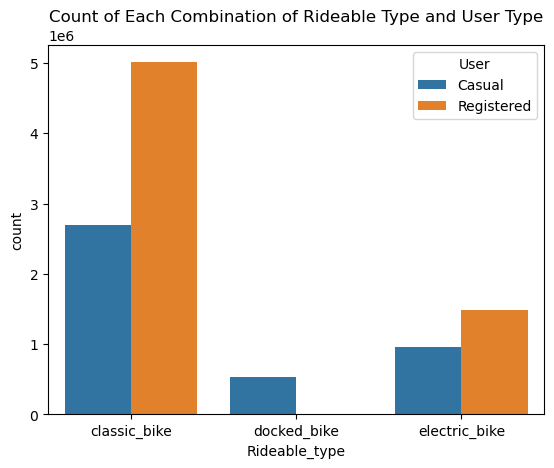

In [54]:
## barplot of combination of bike type and user type
sns.barplot(user_ride_counts,x="Rideable_type", y="count", hue="User")
plt.title('Count of Each Combination of Rideable Type and User Type')

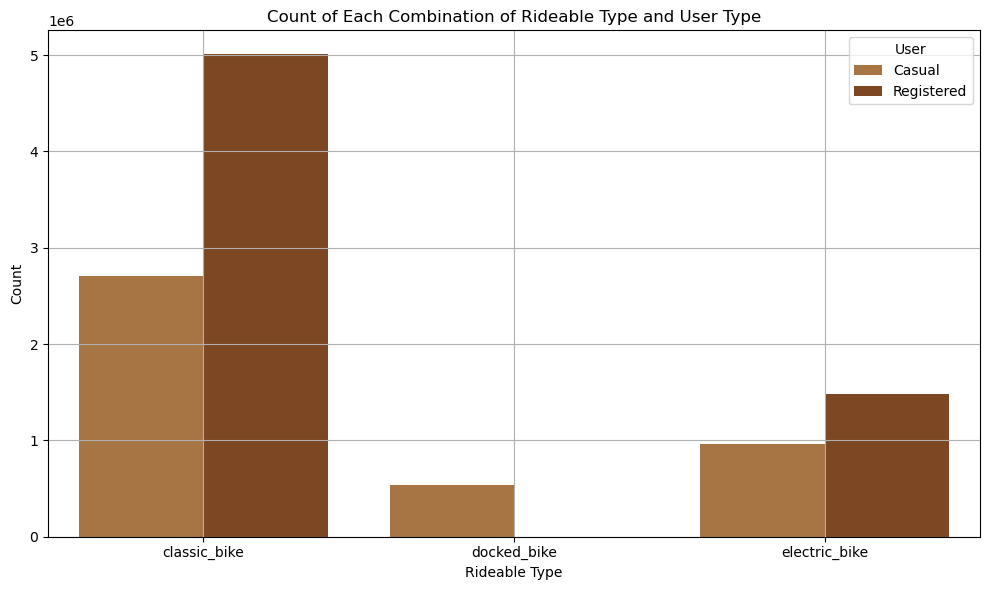

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have data in the 'user_ride_counts' DataFrame

# Define custom color palette with copper and dark brown colors
custom_palette = ['#B87333', '#8B4513']  # Copper and dark brown colors

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=user_ride_counts, x="Rideable_type", y="count", hue="User", palette=custom_palette)
plt.title('Count of Each Combination of Rideable Type and User Type')
plt.xlabel('Rideable Type')
plt.ylabel('Count')
plt.legend(title='User')
plt.grid(True)
plt.tight_layout()
plt.show()


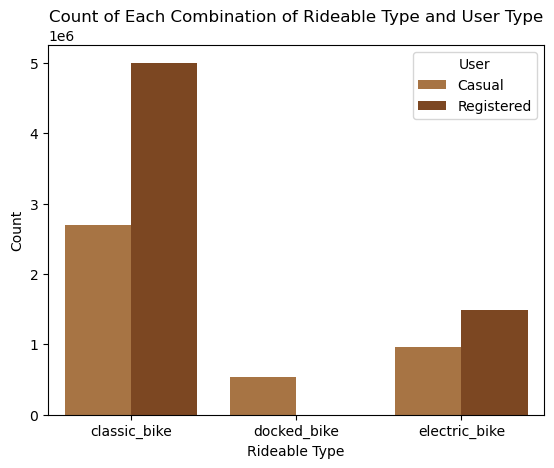

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom color palette with light copper and dark brown colors
custom_palette = ['#B87333', '#8B4513']

# Plot barplot
sns.barplot(data=user_ride_counts, x="Rideable_type", y="count", hue="User", palette=custom_palette)
plt.title('Count of Each Combination of Rideable Type and User Type')
plt.xlabel('Rideable Type')
plt.ylabel('Count')
plt.legend(title='User', loc='upper right')
plt.show()


In [57]:
full["Duration"].value_counts().head(10)

Duration
0 days 00:06:44    10382
0 days 00:06:53    10370
0 days 00:06:24    10365
0 days 00:06:09    10355
0 days 00:06:11    10350
0 days 00:07:13    10338
0 days 00:05:47    10306
0 days 00:05:32    10302
0 days 00:06:21    10296
0 days 00:06:34    10292
Name: count, dtype: int64

In [58]:
full.groupby('Rideable_type').size()

Rideable_type
classic_bike     7710372
docked_bike       539474
electric_bike    2444151
dtype: int64

Text(0.5, 1.0, 'User Distribution from 2021-2023')

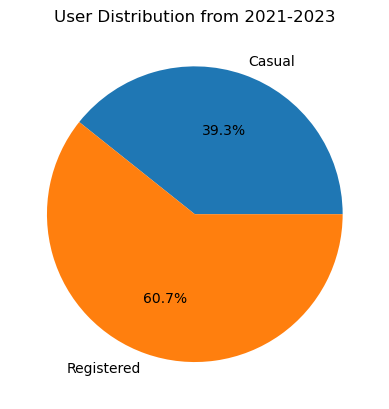

In [59]:
full.groupby('User').size().plot(kind='pie', autopct='%.1f%%')
plt.title("User Distribution from 2021-2023")


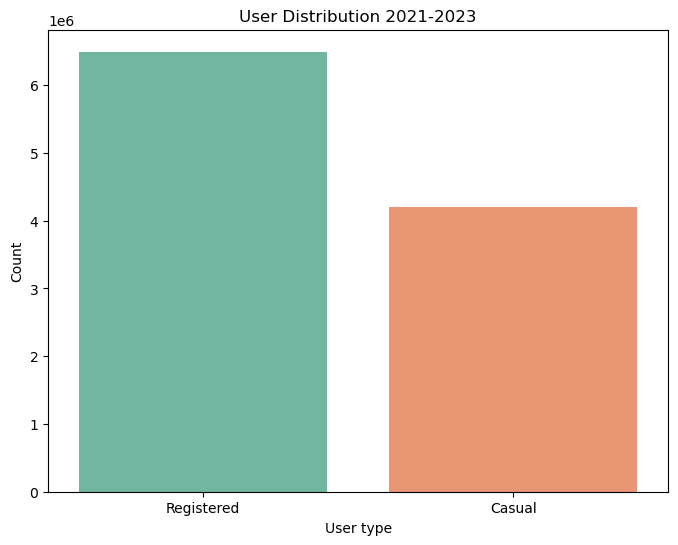

In [60]:

# Plotting 
plt.figure(figsize=(8, 6))
sns.countplot(data=full, x='User', palette='Set2')
plt.title("User Distribution 2021-2023")
plt.xlabel("User type")
plt.ylabel("Count")
plt.show()


Text(0.5, 1.0, 'Bike Type Distribution 2021-2023')

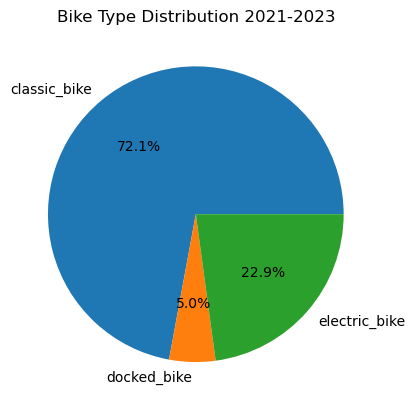

In [61]:
full.groupby('Rideable_type').size().plot(kind='pie', autopct='%.1f%%')
plt.title("Bike Type Distribution 2021-2023")

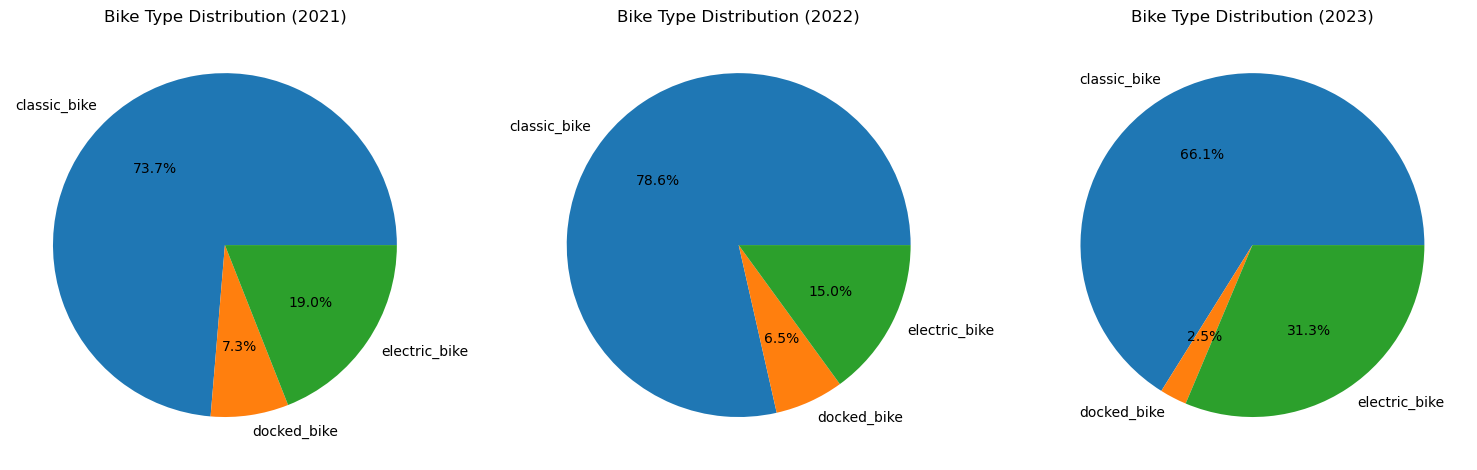

In [62]:


# Create subplots for three pie charts
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Iterate over years and plot pie chart for each year
for i, year in enumerate([2021, 2022, 2023]):
    # Filter data for current year
    data_year = full[full['year'] == year]  
    
    # Group data by rideable type and calculate size
    group_by_type = data_year.groupby('Rideable_type').size()
    
    # Plot pie chart for current year
    group_by_type.plot(kind='pie', autopct='%.1f%%', ax=axes[i])
    axes[i].set_title(f"Bike Type Distribution ({year})")

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


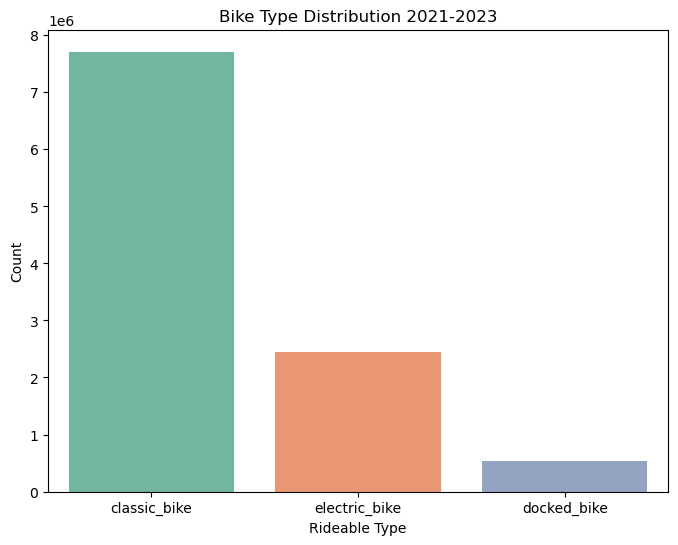

In [63]:

plt.figure(figsize=(8, 6))
sns.countplot(data=full, x='Rideable_type', palette='Set2')
plt.title("Bike Type Distribution 2021-2023")
plt.xlabel("Rideable Type")
plt.ylabel("Count")
plt.show()


In [64]:
## getting the most occured ride duration
most_duration=full["Duration"].value_counts().head(10)
#creating a Datafrane from the series
most_duration_df = most_duration.to_frame().reset_index()

most_duration_df.columns = ['Duration', 'Frequency']


In [65]:
most_duration_df

,Duration,Frequency
0,0 days 00:06:44,10382
1,0 days 00:06:53,10370
2,0 days 00:06:24,10365
3,0 days 00:06:09,10355
4,0 days 00:06:11,10350
5,0 days 00:07:13,10338
6,0 days 00:05:47,10306
7,0 days 00:05:32,10302
8,0 days 00:06:21,10296
9,0 days 00:06:34,10292


Top ten popular stations

In [66]:
## getting the top ten start station
top_ten_station=full["Start_station_name"].value_counts().head(10)
#creating a Datafrane from the series
top_ten_Start_station_df = top_ten_station.to_frame().reset_index()

top_ten_Start_station_df.columns = ['Start_station', 'Frequency']




In [67]:
top_ten_Start_station_df

,Start_station,Frequency
0,New Hampshire Ave & T St NW,104815
1,Columbus Circle / Union Station,102847
2,15th & P St NW,98013
3,Lincoln Memorial,97827
4,Jefferson Dr & 14th St SW,89369
5,1st & M St NE,88887
6,4th St & Madison Dr NW,84899
7,5th & K St NW,78519
8,14th & V St NW,78479
9,Smithsonian-National Mall / Jefferson Dr & 12t...,77609


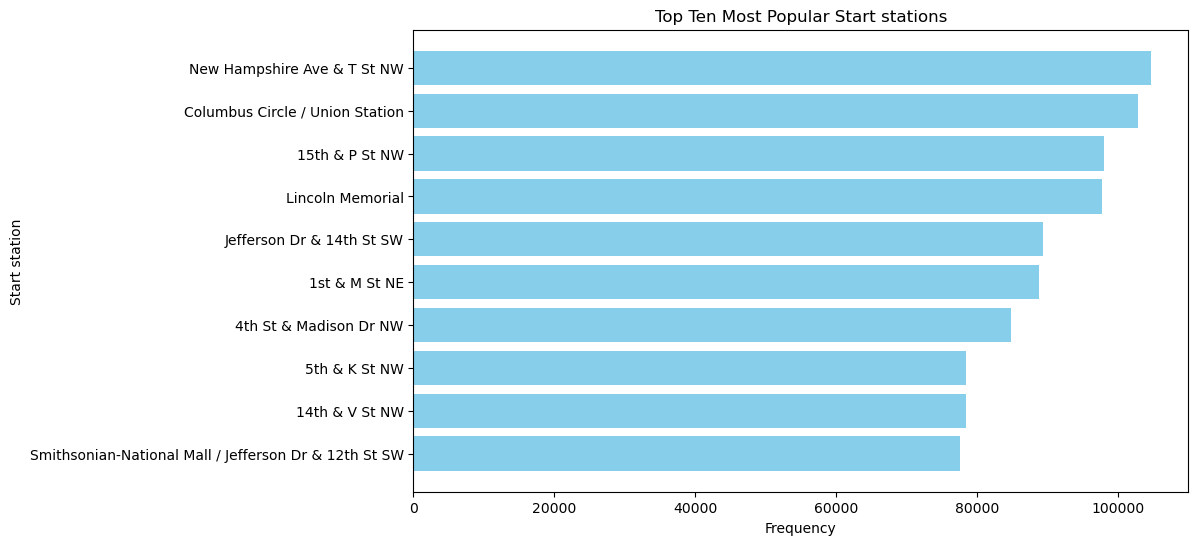

In [68]:
# Plotting for Top ten stations
plt.figure(figsize=(10, 6))
plt.barh(top_ten_Start_station_df['Start_station'], top_ten_Start_station_df['Frequency'], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Start station')
plt.title('Top Ten Most Popular Start stations')
plt.gca().invert_yaxis()  # Invert y-axis to display the most frequent value at the top
plt.show()

In [69]:
## getting the top ten end station
top_ten_station=full["End_station_name"].value_counts().head(10)
#creating a Datafrane from the series
top_ten_End_station_df = top_ten_station.to_frame().reset_index()

top_ten_End_station_df.columns = ['End_station', 'Frequency']

In [70]:
top_ten_End_station_df

,End_station,Frequency
0,Columbus Circle / Union Station,104589
1,New Hampshire Ave & T St NW,103221
2,15th & P St NW,98855
3,Lincoln Memorial,96032
4,Jefferson Dr & 14th St SW,92158
5,1st & M St NE,89838
6,4th St & Madison Dr NW,83684
7,Massachusetts Ave & Dupont Circle NW,80572
8,5th & K St NW,79702
9,Smithsonian-National Mall / Jefferson Dr & 12t...,79454


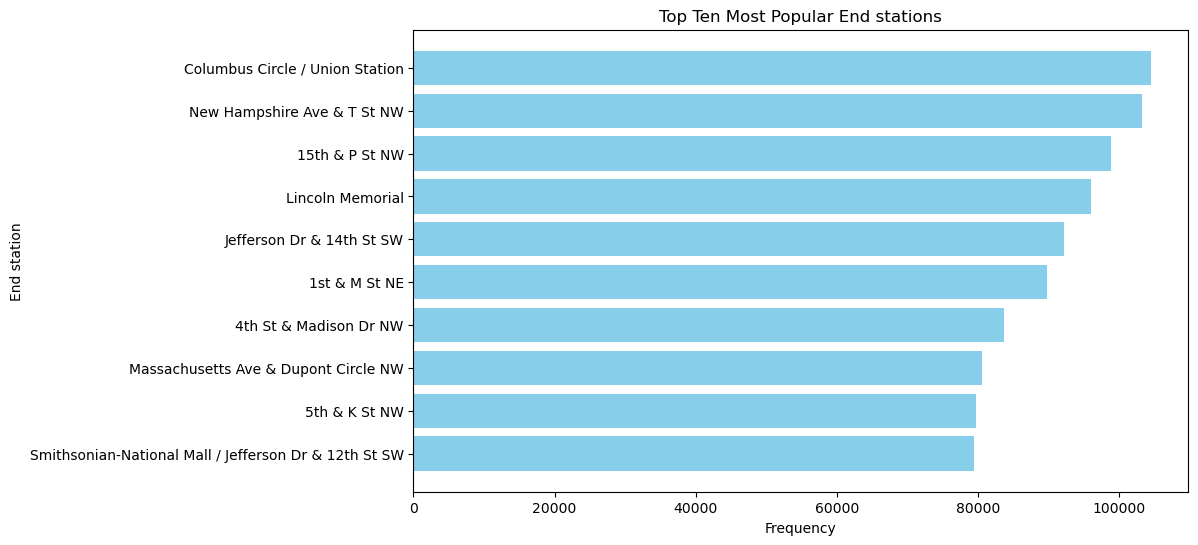

In [71]:
## Plotting for Top ten stations
plt.figure(figsize=(10, 6))
plt.barh(top_ten_End_station_df['End_station'], top_ten_End_station_df['Frequency'], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('End station')
plt.title('Top Ten Most Popular End stations')
plt.gca().invert_yaxis()  # Invert y-axis to display the most frequent value at the top
plt.show()

Least ten popular stations

In [72]:
# getting the top ten start station
least_ten_station=full["Start_station_name"].value_counts().tail(10)
#creating a Datafrane from the series
least_ten_Start_station_df = least_ten_station.to_frame().reset_index()

least_ten_Start_station_df.columns = ['Start_station', 'Frequency']




In [73]:
least_ten_Start_station_df

,Start_station,Frequency
0,Route 29 & Circle Woods Dr,5
1,Mission Square Dr & Miranda Ct,4
2,Prosperity Ave & Avenir Pl,4
3,Westbranch Dr & Jones Branch Dr,3
4,W&OD Trail bridge & N Washington St,2
5,MTL-ECO5-03,2
6,21st NW & E St NW,2
7,Kingsbridge Dr & Draper Dr,2
8,N Moore St & Rosslyn Metro,1
9,10th & Rhode Island Ave NE,1


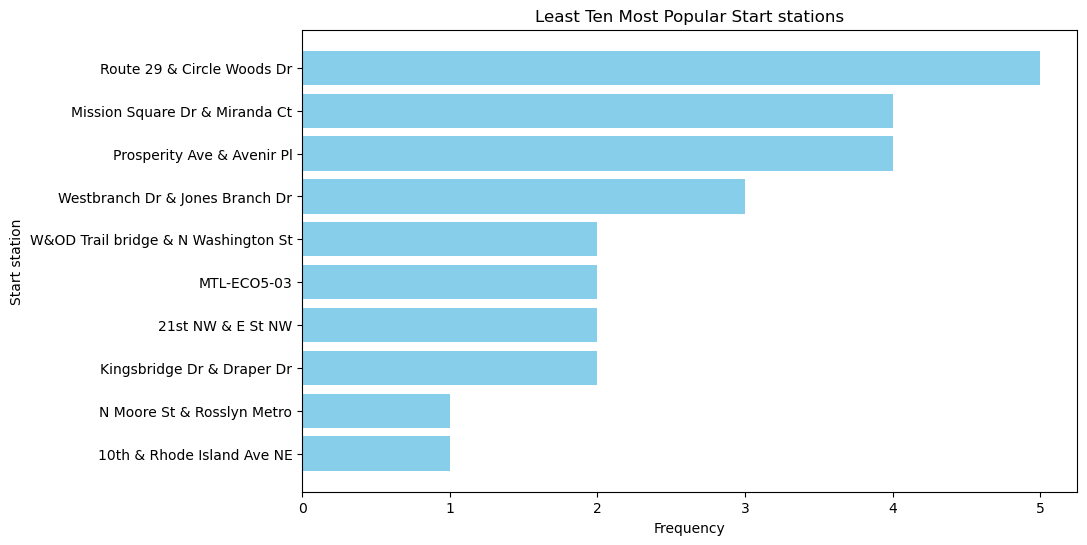

In [74]:
# Plotting for Least ten stations
plt.figure(figsize=(10, 6))
plt.barh(least_ten_Start_station_df['Start_station'], least_ten_Start_station_df['Frequency'], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Start station')
plt.title('Least Ten Most Popular Start stations')
plt.gca().invert_yaxis()  # Invert y-axis to display the most frequent value at the top
plt.show()

In [75]:
# getting the top ten End station
least_ten_station=full["End_station_name"].value_counts().tail(10)
#creating a Datafrane from the series
least_ten_End_station_df = least_ten_station.to_frame().reset_index()

least_ten_End_station_df.columns = ['End_station', 'Frequency']


In [76]:
least_ten_End_station_df

,End_station,Frequency
0,Mission Square Dr & Miranda Ct,4
1,Prosperity Ave & Avenir Pl,4
2,Kingsbridge Dr & Draper Dr,3
3,W&OD Trail bridge & N Washington St,2
4,MTL-ECO5-03,2
5,Motivate BX Tech office,1
6,George Mason Blvd & Armstrong,1
7,tech trailer V-1,1
8,10th & Rhode Island Ave NE,1
9,21st NW & E St NW,1


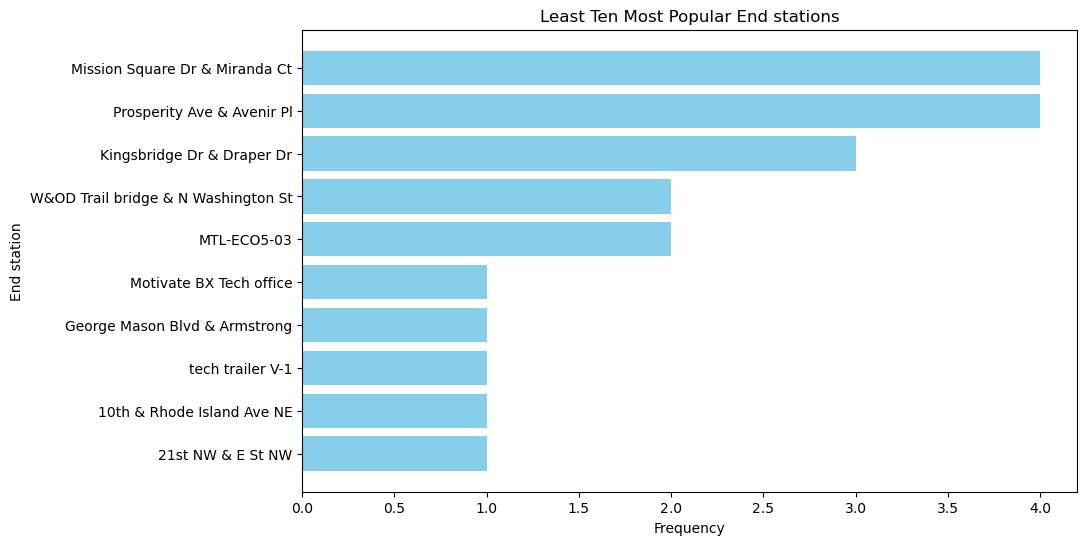

In [77]:
# Plotting for Least ten stations
plt.figure(figsize=(10, 6))
plt.barh(least_ten_End_station_df['End_station'], least_ten_End_station_df['Frequency'], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('End station')
plt.title('Least Ten Most Popular End stations')
plt.gca().invert_yaxis()  # Invert y-axis to display the most frequent value at the top
plt.show()

In [78]:
# Count the occurrences of each location
location_counts = full['Start_location'].value_counts()

# Get the top ten locations
top_ten_locations = location_counts.head(10)

#creating a Datafrane from the series
top_ten_Start_location_df = top_ten_locations.to_frame().reset_index()

top_ten_Start_location_df.columns = ['Start_location', 'Frequency']



In [79]:
top_ten_Start_location_df

,Start_location,Frequency
0,"(38.915544, -77.038252)",90916
1,"(38.89696, -77.00493)",88749
2,"(38.90980062655191, -77.03442692756653)",80874
3,"(38.905697, -77.005483)",74642
4,"(38.888774, -77.028694)",73037
5,"(38.890539, -77.049383)",72609
6,"(38.90304, -77.019027)",67497
7,"(38.9177645, -77.032096)",64552
8,"(38.888255, -77.0494365)",63439
9,"(38.9101, -77.0444)",63328


In [80]:
station_location_counts = full[["Start_station_name",'Start_location']].value_counts()
# Get the top ten locations
top_ten_station_locations = station_location_counts.head(10)

#creating a Datafrane from the series
top_ten_station_locations_df = top_ten_station_locations.to_frame().reset_index()

top_ten_station_locations_df.columns = ["Start_station",'Start_location','Frequency']


In [81]:
top_ten_station_locations_df

,Start_station,Start_location,Frequency
0,New Hampshire Ave & T St NW,"(38.915544, -77.038252)",90916
1,Columbus Circle / Union Station,"(38.89696, -77.00493)",88749
2,15th & P St NW,"(38.90980062655191, -77.03442692756653)",80874
3,1st & M St NE,"(38.905697, -77.005483)",74642
4,Smithsonian-National Mall / Jefferson Dr & 12t...,"(38.888774, -77.028694)",73037
5,Henry Bacon Dr & Lincoln Memorial Circle NW,"(38.890539, -77.049383)",72609
6,5th & K St NW,"(38.90304, -77.019027)",67497
7,14th & V St NW,"(38.9177645, -77.032096)",64552
8,Lincoln Memorial,"(38.888255, -77.0494365)",63439
9,Massachusetts Ave & Dupont Circle NW,"(38.9101, -77.0444)",63328


Mapping using folium

In [82]:
## Top Ten Start Staions

import folium

# Initialize the map at a starting location
mymap = folium.Map(location=[38.9072, -77.0369], zoom_start=12)

# Data for start stations and their locations
start_stations = [
    {"station": "New Hampshire Ave & T St NW", "location": (38.915544, -77.038252)},
    {"station": "Columbus Circle / Union Station", "location": (38.89696, -77.00493)},
    {"station": "15th & P St NW", "location": (38.90980062655191, -77.03442692756653)},
    {"station": "1st & M St NE", "location": (38.905697, -77.005483)},
    {"station": "Smithsonian-National Mall / Jefferson Dr & 12th St SW", "location": (38.888774, -77.028694)},
    {"station": "Henry Bacon Dr & Lincoln Memorial Circle NW", "location": (38.890539, -77.049383)},
    {"station": "5th & K St NW", "location": (38.90304, -77.019027)},
    {"station": "14th & V St NW", "location": (38.9177645, -77.032096)},
    {"station": "Lincoln Memorial", "location": (38.888255, -77.0494365)},
    {"station": "Massachusetts Ave & Dupont Circle NW", "location": (38.9101, -77.0444)}
]

# Add markers for start stations to the map
for start_station in start_stations:
    folium.Marker(location=start_station["location"], popup=start_station["station"]).add_to(mymap)
    

# Save the map
mymap.save("start_stations_map.html")
#display map
mymap


In [83]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster

# Example DataFrame
data = {
    'Start_station': [
        'New Hampshire Ave & T St NW',
        'Columbus Circle / Union Station',
        '15th & P St NW',
        '1st & M St NE',
        'Smithsonian-National Mall / Jefferson Dr & 12th St SW',
        'Henry Bacon Dr & Lincoln Memorial Circle NW',
        '5th & K St NW',
        '14th & V St NW',
        'Lincoln Memorial',
        'Massachusetts Ave & Dupont Circle NW'
    ],
    'Start_location': [
        (38.915544, -77.038252),
        (38.89696, -77.00493),
        (38.90980062655191, -77.03442692756653),
        (38.905697, -77.005483),
        (38.888774, -77.028694),
        (38.890539, -77.049383),
        (38.90304, -77.019027),
        (38.9177645, -77.032096),
        (38.888255, -77.0494365),
        (38.9101, -77.0444)
    ],
    'Frequency': [
        90916, 88749, 80874, 74642, 73037,
        72609, 67497, 64552, 63439, 63328
    ]
}

df = pd.DataFrame(data)

# Create a map centered around Washington, D.C.
map_dc = folium.Map(location=[38.9072, -77.0369], zoom_start=12)

# Create a marker cluster
marker_cluster = MarkerCluster().add_to(map_dc)

# Add markers for each station
for index, row in df.iterrows():
    folium.Marker(
        location=row['Start_location'],  # Use Start_location for marker location
        popup=f"Station: {row['Start_station']}<br>Frequency: {row['Frequency']}",
        icon=None,
    ).add_to(marker_cluster)
#display map
map_dc



In [84]:
import folium

# Create a map centered at a specific location
mymap = folium.Map(location=[38.915544, -77.038252], zoom_start=12)

# List of locations
locations =top_ten_station_locations_df["Start_location","Start_station"] 

# Add markers for each location
for location in locations:
    folium.Marker(location=[location['latitude'], location['longitude']], popup=location['name']).add_to(mymap)

# Display the map
mymap


KeyError: ('Start_location', 'Start_station')

In [ ]:
## mapping of top ten end station
import folium

# Create a map object
m = folium.Map(location=[38.9072, -77.0369], zoom_start=12)  # Washington, DC coordinates

# Add markers for end station locations
end_stations = [
    {"name": "Columbus Circle / Union Station", "location": (38.89696, -77.00493), "frequency": 102555},
    {"name": "New Hampshire Ave & T St NW", "location": (38.915544, -77.038252), "frequency": 100772},
    {"name": "15th & P St NW", "location": (38.90980062655191, -77.03442692756653), "frequency": 92416},
    {"name": "1st & M St NE", "location": (38.905697, -77.005483), "frequency": 86539},
    {"name": "Smithsonian-National Mall / Jefferson Dr & 12th St SW", "location": (38.888774, -77.028694), "frequency": 78758},
    {"name": "Massachusetts Ave & Dupont Circle NW", "location": (38.9101, -77.0444), "frequency": 78465},
    {"name": "5th & K St NW", "location": (38.90304, -77.019027), "frequency": 77767},
    {"name": "Henry Bacon Dr & Lincoln Memorial Circle NW", "location": (38.890539, -77.049383), "frequency": 76262},
    {"name": "14th & V St NW", "location": (38.9177645, -77.032096), "frequency": 73856},
    {"name": "Lincoln Memorial", "location": (38.888255, -77.0494365), "frequency": 71116}
]

for station in end_stations:
    folium.Marker(location=station["location"], popup=f"{station['name']} - Frequency: {station['frequency']}", icon=folium.Icon(color='green')).add_to(m)

# Save the map
m.save('end_stations_map.html')

# Display the map
m


In [ ]:
## mapping of top ten end station
import folium

# Create a map object and chososing a tileset
m = folium.Map(location=[38.9072, -77.0369], tiles="cartodb positron", zoom_start=12)  # Washington, DC coordinates

# Add markers for end station locations
end_stations = [
    {"name": "Columbus Circle / Union Station", "location": (38.89696, -77.00493), "frequency": 102555},
    {"name": "New Hampshire Ave & T St NW", "location": (38.915544, -77.038252), "frequency": 100772},
    {"name": "15th & P St NW", "location": (38.90980062655191, -77.03442692756653), "frequency": 92416},
    {"name": "1st & M St NE", "location": (38.905697, -77.005483), "frequency": 86539},
    {"name": "Smithsonian-National Mall / Jefferson Dr & 12th St SW", "location": (38.888774, -77.028694), "frequency": 78758},
    {"name": "Massachusetts Ave & Dupont Circle NW", "location": (38.9101, -77.0444), "frequency": 78465},
    {"name": "5th & K St NW", "location": (38.90304, -77.019027), "frequency": 77767},
    {"name": "Henry Bacon Dr & Lincoln Memorial Circle NW", "location": (38.890539, -77.049383), "frequency": 76262},
    {"name": "14th & V St NW", "location": (38.9177645, -77.032096), "frequency": 73856},
    {"name": "Lincoln Memorial", "location": (38.888255, -77.0494365), "frequency": 71116}
]

for station in end_stations:
    folium.Marker(location=station["location"], popup=f"{station['name']} - Frequency: {station['frequency']}", icon=folium.Icon(color='green')).add_to(m)



# Display the map
m


In [ ]:
## Top Ten Start Staions

import folium

# Initialize the map at a starting location
mymap = folium.Map(location=[38.9072, -77.0369], zoom_start=12)


# Data for start stations and their locations
start_stations = [
    {"station": "New Hampshire Ave & T St NW", "location": (38.915544, -77.038252)},
    {"station": "Columbus Circle / Union Station", "location": (38.89696, -77.00493)},
    {"station": "15th & P St NW", "location": (38.90980062655191, -77.03442692756653)},
    {"station": "1st & M St NE", "location": (38.905697, -77.005483)},
    {"station": "Smithsonian-National Mall / Jefferson Dr & 12th St SW", "location": (38.888774, -77.028694)},
    {"station": "Henry Bacon Dr & Lincoln Memorial Circle NW", "location": (38.890539, -77.049383)},
    {"station": "5th & K St NW", "location": (38.90304, -77.019027)},
    {"station": "14th & V St NW", "location": (38.9177645, -77.032096)},
    {"station": "Lincoln Memorial", "location": (38.888255, -77.0494365)},
    {"station": "Massachusetts Ave & Dupont Circle NW", "location": (38.9101, -77.0444)}
]

# Add markers for start stations to the map
for start_station in start_stations:
    folium.Marker(location=start_station["location"], popup=start_station["station"]).add_to(mymap)
    


#display map
mymap
